# Gen AI Assignment 1: Tokenizer

Saima Kausar

Ayesha Amjad

In this assignment, we explore tokenization. Tokenization helps break text into smaller components, such as words or subwords, for better analysis and processing.we applied tokenization techniques to a Python dataset.


#Dataset Preparation (Python Language)

The dataset used for training the tokenizer is derived from the GitHub repository of The PhyloToAST project. This dataset provides a diverse range of Python code.

##Collect Data

In [ ]:
# Install the datasets library
!pip install datasets

# Import the library
from datasets import load_dataset

# Load the Python subset of the CodeSearchNet dataset
dataset = load_dataset("code_search_net", "python")

# Display an example
print(dataset['train'][0])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

code_search_net.py:   0%|          | 0.00/8.44k [00:00<?, ?B/s]

The repository for code_search_net contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/code_search_net.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


python.zip:   0%|          | 0.00/941M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/412178 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/22176 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23107 [00:00<?, ? examples/s]

{'repository_name': 'cisco-sas/kitty', 'func_path_in_repository': 'kitty/data/data_manager.py', 'func_name': 'Table.update', 'whole_func_string': "def update(self, field_dict, where_clause=None):\n        '''\n        update db entry\n\n        :param field_dict: dictionary of fields and values\n        :param where_clause: where clause for the update\n        '''\n        query = '''\n        UPDATE %s SET %s\n        ''' % (\n            self._name,\n            ','.join('%s=:%s' % (k, k) for k in field_dict)\n        )\n        if where_clause:\n            query += ' WHERE %s' % (where_clause)\n        self._cursor.execute(query, field_dict)\n        self._connection.commit()", 'language': 'python', 'func_code_string': "def update(self, field_dict, where_clause=None):\n        '''\n        update db entry\n\n        :param field_dict: dictionary of fields and values\n        :param where_clause: where clause for the update\n        '''\n        query = '''\n        UPDATE %s SET %s

In [ ]:
# Extract function code from dataset
code_samples = [entry['func_code_string'] for entry in dataset['train']]

In [ ]:
print(code_samples[0])

def update(self, field_dict, where_clause=None):
        '''
        update db entry

        :param field_dict: dictionary of fields and values
        :param where_clause: where clause for the update
        '''
        query = '''
        UPDATE %s SET %s
        ''' % (
            self._name,
            ','.join('%s=:%s' % (k, k) for k in field_dict)
        )
        if where_clause:
            query += ' WHERE %s' % (where_clause)
        self._cursor.execute(query, field_dict)
        self._connection.commit()


##Save Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saves the extracted function code samples into a text file (python_corpus.txt) in Google Drive.
Writes each function code as a separate line in the file.

In [ ]:
save_path = "/content/drive/My Drive/python_corpus.txt"
with open(save_path, "w") as f:
    for code in code_samples:
        f.write(code + "\n")  # Keeps original formatting

print(f"File saved at: {save_path}")

File saved at: /content/drive/My Drive/python_corpus.txt


##Data Pre-processing

In [ ]:
import re

def filter_python_text(input_file, output_file):
    python_pattern = re.compile(r'^[\w\s.,!?\'\"()\[\]{}<>+=\-*/%^&|~`@#;:\\_]+$')

    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
        for line in infile:
            cleaned_line = "".join(char if python_pattern.match(char) else " " for char in line)
            outfile.write(cleaned_line)  # Keeps original indentation and formatting

# Usage
input_path = "/content/drive/My Drive/python_corpus.txt"
output_path = "/content/drive/My Drive/clean_python_corpus.txt"
filter_python_text(input_path, output_path)


In [ ]:
file_path = "/content/drive/My Drive/clean_python_corpus.txt"

with open(file_path, "r", encoding="utf-8") as f:
    for i in range(17):
        print(f.readline(), end="")  # Avoids extra newlines


def update(self, field_dict, where_clause=None):
        '''
        update db entry

        :param field_dict: dictionary of fields and values
        :param where_clause: where clause for the update
        '''
        query = '''
        UPDATE %s SET %s
        ''' % (
            self._name,
            ','.join('%s=:%s' % (k, k) for k in field_dict)
        )
        if where_clause:
            query += ' WHERE %s' % (where_clause)
        self._cursor.execute(query, field_dict)
        self._connection.commit()


#Implement BPE Tokenization





##Preprocess Data

Special tokens are added to preserve the structure of Python code, ensuring that indentation (<IND>) and dedentation (<DED>) are explicitly recognized instead of relying on raw spaces. Comments and docstrings are replaced with <COMMENT> to retain context without unnecessary details. This improves tokenization efficiency.

In [ ]:
import re

def preprocess_code(line):
    """
    Preprocess code by replacing indentation, dedentation, newlines, and comments with special tokens.
    """
    line = line.rstrip()  # Remove trailing spaces

    # Handle indentation (spaces at start)
    indent_match = re.match(r"^(\s+)", line)
    if indent_match:
        line = line.replace(indent_match.group(1), "<IND> ", 1)  # Replace leading spaces with <IND>

    # Handle dedentation (for simplicity, assume dedentation occurs after new block ends)
    if line.strip() == "":  # Empty line means possible dedentation
        line = "<DED>"

    # Replace inline comments (starting with #) with <COMMENT>
    line = re.sub(r"#.*", "<COMMENT>", line)

    # Replace docstrings (''' or """) with <COMMENT>
    line = re.sub(r"('''.*?'''|\"\"\".*?\"\"\")", "<COMMENT>", line, flags=re.DOTALL)

    # Ensure newlines are marked
    line += " <NEWLINE>"

    return line

# Test cases
test_code = [
    "def my_function():",
    "    '''This is a docstring'''",
    "    print('Hello, World!')  # This is a comment",
    "",
    "print('Done')"
]

# Apply preprocessing
processed_code = [preprocess_code(line) for line in test_code]

# Display result
for original, processed in zip(test_code, processed_code):
    print(f"Original: {original}\nProcessed: {processed}\n")


Original: def my_function():
Processed: def my_function(): <NEWLINE>

Original:     '''This is a docstring'''
Processed: <IND> <COMMENT> <NEWLINE>

Original:     print('Hello, World!')  # This is a comment
Processed: <IND> print('Hello, World!')  <COMMENT> <NEWLINE>

Original: 
Processed: <DED> <NEWLINE>

Original: print('Done')
Processed: print('Done') <NEWLINE>



In [ ]:
import re
raw_save_path = "/content/drive/My Drive/clean_python_corpus.txt"
processed_save_path = "/content/drive/My Drive/preprocessed_python_corpus.txt"

# Define special tokens for Python
unk_token = "<UNK>"
spl_tokens = ["<UNK>", "<SEP>", "<MASK>", "<CLS>", "<IND>", "<DED>", "<NEWLINE>", "<COMMENT>"]
def preprocess_code(line):
    """
    Preprocess code by replacing indentation, dedentation, newlines, and comments with special tokens.
    """
    line = line.rstrip()  # Remove trailing spaces

    # Handle indentation (spaces at start)
    indent_match = re.match(r"^(\s+)", line)
    if indent_match:
        line = line.replace(indent_match.group(1), "<IND> ", 1)  # Replace leading spaces with <IND>

    # Handle dedentation (for simplicity, assume dedentation occurs after new block ends)
    if line.strip() == "":  # Empty line means possible dedentation
        line = "<DED>"

    # Replace inline comments (starting with #) with <COMMENT>
    line = re.sub(r"#.*", "<COMMENT>", line)

    # Replace docstrings (''' or """) with <COMMENT>
    line = re.sub(r"('''.*?'''|\"\"\".*?\"\"\")", "<COMMENT>", line, flags=re.DOTALL)

    # Ensure newlines are marked
    line += " <NEWLINE>"

    return line

# Process large file line-by-line (to avoid RAM crash)
with open(raw_save_path, "r", encoding="utf-8") as infile, open(processed_save_path, "w", encoding="utf-8") as outfile:
    for line in infile:
        processed_line = preprocess_code(line)
        outfile.write(processed_line + "\n")

The entire cleaned dataset is processed line by line to efficiently apply the preprocess_code() function. Each line undergoes transformation where indentation, dedentation, comments, and newlines are replaced with special tokens to preserve the structure and meaning of the code. The processed lines are then saved in a new file, preprocessed_python_corpus.txt.

## The most frequent words in our dataset

<ipython-input-54-89a892d38567>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Word", y="Frequency", palette="viridis")


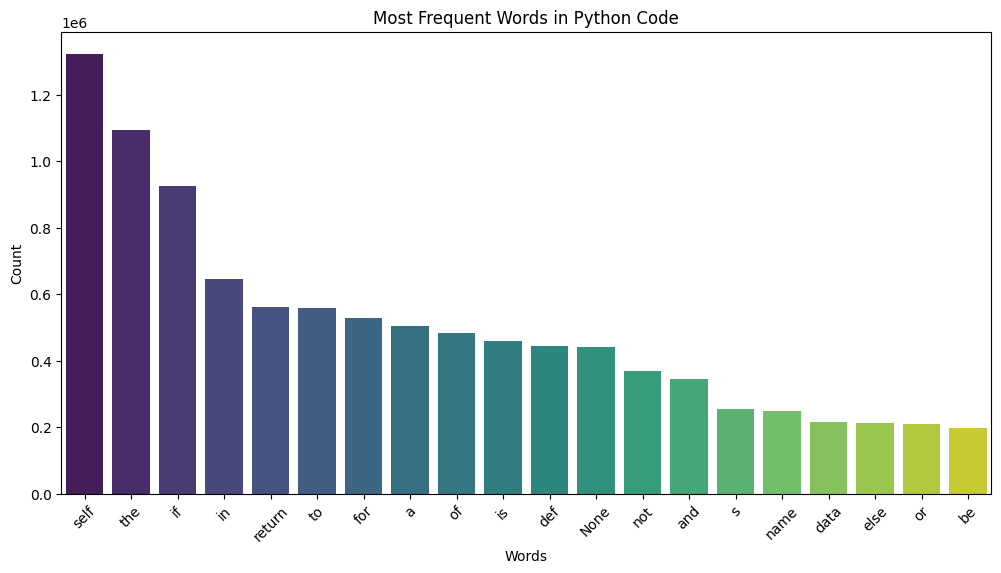

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def plot_top_words(file_path, top_n=20):
    word_counter = Counter()
    word_pattern = re.compile(r'\b[a-zA-Z_][a-zA-Z0-9_]*\b')

    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        for line in file:
            words = word_pattern.findall(line)
            word_counter.update(words)

    df = pd.DataFrame(word_counter.most_common(top_n), columns=["Word", "Frequency"])

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x="Word", y="Frequency", palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("Words")
    plt.ylabel("Count")
    plt.title("Most Frequent Words in Python Code")
    plt.show()

# Example usage
file_path = "/content/drive/My Drive/clean_python_corpus.txt"
plot_top_words(file_path)

##Training Tokenizer

In [61]:
import pandas as pd
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
import re

processed_save_path = "/content/drive/My Drive/preprocessed_python_corpus.txt"

# Define special tokens for Python
unk_token = "<UNK>"
spl_tokens = ["<UNK>", "<SEP>", "<MASK>", "<CLS>", "<IND>", "<DED>", "<NEWLINE>", "<COMMENT>"]

# Initialize BPE tokenizer
tokenizer = Tokenizer(models.BPE(unk_token=unk_token))
trainer = trainers.BpeTrainer(special_tokens=spl_tokens)

# Attach custom pre-tokenizer
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()

# Train tokenizer
tokenizer.train([processed_save_path], trainer)
tokenizer.save("/content/drive/My Drive/python_bpe_tokenizer.json")

print("BPE Tokenizer training complete!")

BPE Tokenizer training complete!


#Testing Tokenizer

In [ ]:
from tokenizers import Tokenizer
tokenizer = Tokenizer.from_file("/content/drive/My Drive/python_bpe_tokenizer.json")
# Tokenize sample Python code
sample_text = """def my_function():
    \"\"\" This is a docstring \"\"\"
    print('Hello, World!')  # This is a comment
    return 42"""

# Apply pre-tokenization before encoding
preprocessed_text = "\n".join([preprocess_code(line) for line in sample_text.split("\n")])

print("Tokens: ", tokenizer.encode(preprocessed_text).tokens)
print("Token IDs: ", tokenizer.encode(preprocessed_text).ids)

Tokens:  ['def', 'my_', 'function', '():', '<NEWLINE>', '<IND>', '<COMMENT>', '<NEWLINE>', '<IND>', 'print', "('", 'Hello', ',', 'World', "!')", '<COMMENT>', '<NEWLINE>', '<IND>', 'return', '42', '<NEWLINE>']
Token IDs:  [3755, 6023, 4074, 4153, 6, 4, 7, 6, 4, 4160, 3798, 15371, 18, 17271, 9603, 7, 6, 4, 3750, 9284, 6]


#Evaluating Tokenizer

##Vocabulary Size

In [ ]:
from tokenizers import Tokenizer
import json
import numpy as np

# Load trained tokenizer
tokenizer = Tokenizer.from_file("/content/drive/My Drive/python_bpe_tokenizer.json")

# Load dataset
save_path = "/content/drive/My Drive/preprocessed_python_corpus.txt"
with open(save_path, "r", encoding="utf-8") as f:
    data = f.readlines()

# Vocabulary size
vocab_size = len(tokenizer.get_vocab())
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 30000


##Tokenization efficiency (number of tokens per sentence)

In [ ]:
# Tokenize all sentences and get token counts
token_counts = [len(tokenizer.encode(line).tokens) for line in data]

# Compute average tokens per sentence
avg_tokens_per_sentence = sum(token_counts) / len(token_counts)
print("Tokenization Efficiency (Avg. Tokens per Sentence):", avg_tokens_per_sentence)


Tokenization Efficiency (Avg. Tokens per Sentence): 9.378485694674431


##Out-of-vocabulary (OOV) rate

In [62]:
vocab = tokenizer.get_vocab()
vocab_file = "/content/drive/My Drive/python_tokenizer_vocab.json"
with open(vocab_file, "w") as f:
    json.dump(vocab, f, indent=4)
print(f"Vocabulary saved in {vocab_file}, Size: {len(vocab)}")

Vocabulary saved in /content/drive/My Drive/python_tokenizer_vocab.json, Size: 30000


In [66]:
# Identify OOV words in a given text
def find_oov_words(text):
    encoded = tokenizer.encode(text)
    oov_words = [word for word in text.split() if "[UNK]" in tokenizer.encode(word).tokens]
    return oov_words

# Calculate OOV Rate for the entire dataset
def calculate_dataset_oov_rate(dataset_file):
    with open(dataset_file, "r", encoding="utf-8") as f:
        text = f.read()
    unique_words = set(text.split())  # Get unique words from dataset
    oov_words = [word for word in unique_words if "[UNK]" in tokenizer.encode(word).tokens]

    oov_rate = (len(oov_words) / len(unique_words)) * 100 if unique_words else 0
    return oov_words, oov_rate


# Calculate overall OOV rate for the dataset
dataset_oov_words, dataset_oov_rate = calculate_dataset_oov_rate("/content/drive/My Drive/preprocessed_python_corpus.txt")
print("\nOut-of-Vocabulary (OOV) Words in Dataset:", dataset_oov_words[:20])  # Show first 20 OOV words
print("OOV Rate (Whole Vocabulary):", dataset_oov_rate)


Out-of-Vocabulary (OOV) Words in Dataset: []
OOV Rate (Whole Vocabulary): 0.0


In [60]:
from collections import Counter

def calculate_oov_rate(dataset_file, tokenizer, min_freq=1, threshold=2):
    with open(dataset_file, "r", encoding="utf-8") as f:
        text = f.read()

    words = text.split()
    word_counts = Counter(words)

    # Identify rare words (words with low frequency)
    rare_words = [word for word, count in word_counts.items() if count < threshold]

    # Detect OOV words (words that are tokenized into multiple subwords)
    oov_words = [word for word in rare_words if len(tokenizer.encode(word).tokens) > 1]

    # Calculate OOV rate
    oov_rate = (len(oov_words) / len(words)) * 100 if words else 0

    return oov_words, oov_rate

oov_words, oov_rate = calculate_oov_rate(save_path, tokenizer)

print(f"OOV Words: {oov_words}")
print(f"OOV Rate: {oov_rate:.2f}%")


OOV Words: ['where_clause=None):', 'field_dict:', "','.join('%s=:%s'", '(where_clause)', "','.join('?'", '(self._name,', '_values)', 'tuple(values))', 'self._cursor.lastrowid', 'report_d', 'report.to_dict()', 'self._serialize_dict(report_d)', 'self.insert(', "['test_id',", "'reason'],", '[test_id,', 'report.get_status(),', "report.get('reason')],", "self.select('*',", "'test_id=?',", '[test_id])', "DB'", 'test_id)', "self._deserialize_dict(values['content'])", 'Report.from_dict(content)', 'get_report_list(self):', "self.select('test_id,", "reason')", 'res.append((row[0],', 'row[1],', 'row[2]))', 'b64encode(zlib.compress(cPickle.dumps(data,', 'protocol=2))).decode()', 'deserializes', 'cPickle.loads(zlib.decompress(b64decode(data.encode())))', 'read_info(self):', "self.select('*')", 'SessionInfo.from_dict(info_d)', 'set_session_info(self,', 'self.info.as_dict()', 'ks.append(k)', 'self.insert(ks,', 'vs)', 'self.info.copy(info)', 'self.update(self.info.as_dict())', 'SessionInfo', 'SessionI

##Efficiency Matrix

In [ ]:
import pandas as pd
import numpy as np

# Extract token frequencies from the Counter object
token_frequencies = list(token_counts.values())

# Additional Metrics
max_tokens_per_sentence = np.max(token_frequencies)
min_tokens_per_sentence = np.min(token_frequencies)
std_dev_tokens = np.std(token_frequencies)
median_tokens = np.median(token_frequencies)

# Efficiency Matrix
efficiency_matrix = pd.DataFrame({
    "Metric": [
        "Vocabulary Size",
        "Avg Tokens per Sentence",
        "Median Tokens per Sentence",
        "Max Tokens per Sentence",
        "Min Tokens per Sentence",
        "Token Std Dev",
        "OOV Rate"
    ],
    "Value": [
        vocab_size,
        avg_tokens_per_sentence,
        median_tokens,
        max_tokens_per_sentence,
        min_tokens_per_sentence,
        std_dev_tokens,
        oov_rate
    ]
})

print(efficiency_matrix)


                       Metric          Value
0             Vocabulary Size   30000.000000
1     Avg Tokens per Sentence       9.378486
2  Median Tokens per Sentence      31.000000
3     Max Tokens per Sentence  981942.000000
4     Min Tokens per Sentence       1.000000
5               Token Std Dev    9170.523845
6                    OOV Rate       7.440105


#Bonus

##Visualize token distributions

avg token per sentence are 9

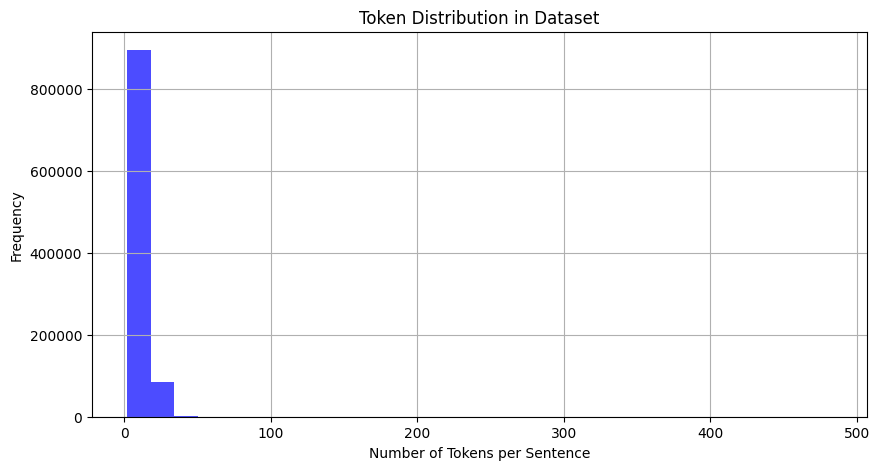

In [ ]:
import matplotlib.pyplot as plt

# Token Distribution Visualization
plt.figure(figsize=(10, 5))
plt.hist(token_counts, bins=30, color='blue', alpha=0.7)
plt.xlabel("Number of Tokens per Sentence")
plt.ylabel("Frequency")
plt.title("Token Distribution in Dataset")
plt.grid()
plt.show()

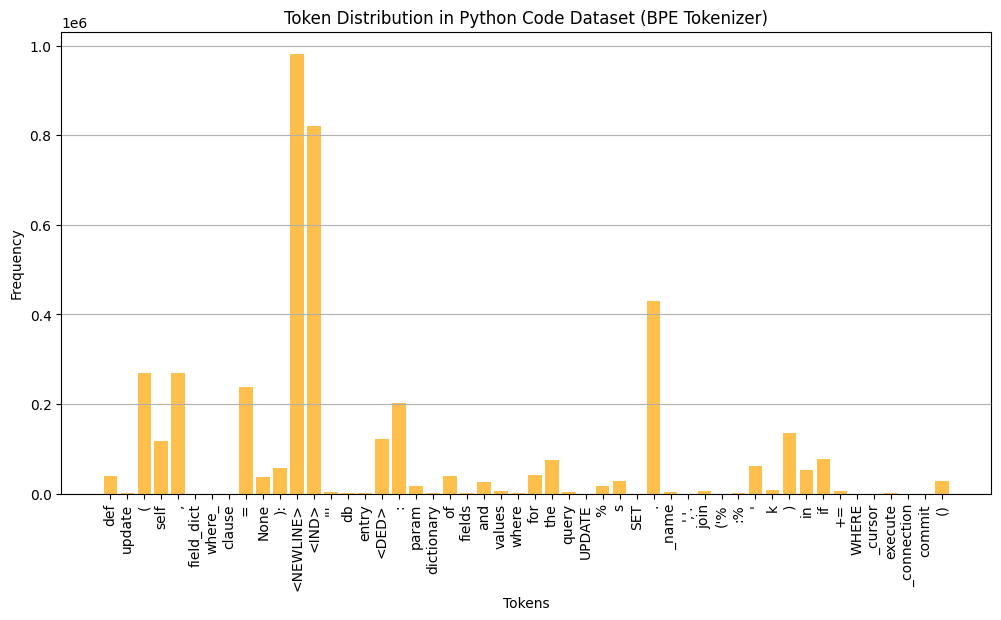

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'tokenizer' is your Python BPE tokenizer and 'python_code_dataset' contains your dataset
tokenized_sentences = [tokenizer.encode(sentence).tokens for sentence in data]

# Flatten the list of tokenized sentences and count token frequencies
all_tokens = [token for sublist in tokenized_sentences for token in sublist]
token_counts = Counter(all_tokens)

# Extract tokens and their frequencies
tokens, frequencies = zip(*token_counts.items())

# Token Frequency Visualization
plt.figure(figsize=(12, 6))
plt.bar(tokens[:50], frequencies[:50], color='orange', alpha=0.7)  # Display top 50 tokens for clarity
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title("Token Distribution in Python Code Dataset (BPE Tokenizer)")
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


##Comparing Tokenizers

We trained four different tokenizers—Byte Pair Encoding (BPE), Unigram, WordPiece, and WordLevel—to compare their results on a Python code dataset. Each tokenizer was trained with a predefined set of special tokens relevant to Python syntax.

In [ ]:
import pandas as pd
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
import re

processed_save_path = "/content/drive/My Drive/preprocessed_python_corpus.txt"

# Define special tokens for Python
unk_token = "<UNK>"
spl_tokens = ["<UNK>", "<SEP>", "<MASK>", "<CLS>", "<IND>", "<DED>", "<NEWLINE>", "<COMMENT>"]

# Define tokenizers and trainers
tokenizer_models = {
    "BPE": (Tokenizer(models.BPE(unk_token=unk_token)), trainers.BpeTrainer(special_tokens=spl_tokens)),
    "UNI": (Tokenizer(models.Unigram()), trainers.UnigramTrainer(special_tokens=spl_tokens)),
    "WPC": (Tokenizer(models.WordPiece()), trainers.WordPieceTrainer(special_tokens=spl_tokens)),
    "WLC": (Tokenizer(models.WordLevel({}, unk_token=unk_token)), trainers.WordLevelTrainer(special_tokens=spl_tokens))
}

# Train and store tokenized data
tokens_dict = {}
for name, (tokenizer, trainer) in tokenizer_models.items():
    tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
    tokenizer.train([processed_save_path], trainer)
    tokenizer.save(f"/content/drive/My Drive/python_{name.lower()}_tokenizer.json")

    # Tokenize sample text
    sample_text = "def my_function():\n    print('Hello, World!')\n    return 42"
    preprocessed_text = "\n".join([preprocess_code(line) for line in sample_text.split("\n")])
    tokens_dict[name] = tokenizer.encode(preprocessed_text).tokens

In [ ]:
import pandas as pd
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
import re
import os

# Paths
base_path = "/content/drive/My Drive/"
processed_save_path = os.path.join(base_path, "preprocessed_python_corpus.txt")

# Define special tokens for Python
unk_token = "<UNK>"
spl_tokens = ["<UNK>", "<SEP>", "<MASK>", "<CLS>", "<IND>", "<DED>", "<NEWLINE>", "<COMMENT>"]

# Tokenizer paths
tokenizer_paths = {
    "BPE": os.path.join(base_path, "python_bpe_tokenizer.json"),
    "UNI": os.path.join(base_path, "python_uni_tokenizer.json"),
    "WPC": os.path.join(base_path, "python_wpc_tokenizer.json"),
    "WLC": os.path.join(base_path, "python_wlc_tokenizer.json"),
}

# Load existing tokenizers
tokenizer_models = {}
for name, path in tokenizer_paths.items():
    if os.path.exists(path):
        tokenizer_models[name] = Tokenizer.from_file(path)
        print(f"Loaded existing {name} tokenizer.")
    else:
        print(f"{name} tokenizer not found.")

# Sample text
sample_text = """def my_function():
    print('Hello, World!')
    return 42"""

preprocessed_text = "\n".join([preprocess_code(line) for line in sample_text.split("\n")])

# Tokenize using all models
tokens_dict = {}
for name, tokenizer in tokenizer_models.items():
    tokens_dict[name] = tokenizer.encode(preprocessed_text).tokens
    print(f"{name} Tokenizer Output:", tokens_dict[name])

print("Tokenization complete!")


Loaded existing BPE tokenizer.
Loaded existing UNI tokenizer.
Loaded existing WPC tokenizer.
Loaded existing WLC tokenizer.
BPE Tokenizer Output: ['def', 'my_', 'function', '():', '<NEWLINE>', '<IND>', 'print', "('", 'Hello', ',', 'World', "!')", '<NEWLINE>', '<IND>', 'return', '42', '<NEWLINE>']
UNI Tokenizer Output: ['def', 'my_', 'function', '():', '<NEWLINE>', '<IND>', 'print', "('", 'H', 'ell', 'o', ',', 'W', 'or', 'ld', '!', "')", '<NEWLINE>', '<IND>', 'return', '4', '2', '<NEWLINE>']
WPC Tokenizer Output: ['def', 'my', '##_function', '():', '<NEWLINE>', '<IND>', 'print', "('", 'Hello', ',', 'World', "!')", '<NEWLINE>', '<IND>', 'return', '42', '<NEWLINE>']
WLC Tokenizer Output: ['def', '<UNK>', '():', '<NEWLINE>', '<IND>', 'print', "('", 'Hello', ',', 'World', "!')", '<NEWLINE>', '<IND>', 'return', '42', '<NEWLINE>']
Tokenization complete!


In [ ]:
# Normalize token lists for comparison
max_len = max(len(tokens) for tokens in tokens_dict.values())
for name in tokens_dict:
    diff = max_len - len(tokens_dict[name])
    tokens_dict[name] += ["<PAD>"] * diff  # Pad shorter token lists

# Create DataFrame for comparison
df = pd.DataFrame(tokens_dict)
print(df.head())  # Show first few rows
df.to_csv("/content/drive/My Drive/tokenizer_comparison.csv", index=False)

print("Comparison complete! Results saved.")

         BPE        UNI          WPC        WLC
0        def        def          def        def
1        my_        my_           my      <UNK>
2   function   function  ##_function        ():
3        ():        ():          ():  <NEWLINE>
4  <NEWLINE>  <NEWLINE>    <NEWLINE>      <IND>
Comparison complete! Results saved.


#Training BPE from Scratch

In [ ]:
import re
import collections
import json

save_path = "/content/drive/My Drive/preprocessed_python_corpus.txt"  # Updated file path

# Load text corpus and build vocabulary
def get_vocab(filename):
    vocab = collections.defaultdict(int)
    with open(filename, 'r', encoding='utf-8') as fhand:
        for line in fhand:
            words = line.strip().split()
            for word in words:
                vocab[' '.join(list(word)) + ' </w>'] += 1  # Add word-end marker
    return vocab

# Get statistics of character pairs
def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs

# Merge the most frequent character pair
def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')  # Match whole words only
    for word in v_in:
        w_out = p.sub(''.join(pair), word)  # Merge the best pair
        v_out[w_out] = v_in[word]
    return v_out

# Get token frequency
def get_tokens(vocab):
    tokens = collections.defaultdict(int)
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens[token] += freq
    return tokens

# Get initial vocabulary
vocab = get_vocab(save_path)

print('==========')
print('Tokens Before BPE')
tokens = get_tokens(vocab)
print('Tokens:', tokens)
print('Number of tokens:', len(tokens))
print('==========')

num_merges = 10000
for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)

    print('Iter:', i)
    print('Best pair:', best)
    tokens = get_tokens(vocab)
    print('Tokens:', tokens)
    print(f"Number of tokens: {len(tokens)}, Vocab size: {len(vocab)}")
    print('==========')

# Save merge rules and vocab
with open("/content/drive/My Drive/vocab.bpe", "w", encoding="utf-8") as f:
    for word in vocab.keys():
        f.write(word + "\n")

with open("/content/drive/My Drive/encoder.json", "w", encoding="utf-8") as f:
    json.dump(list(vocab.keys()), f)

print("BPE training complete!")


In [ ]:
# Load trained vocabulary & merges
with open("/content/drive/My Drive/encoder.json", "r") as f:
    encoder = json.load(f)

with open("/content/drive/My Drive/vocab.bpe", "r") as f:
    merges = [tuple(line.split()) for line in f.read().split("\n")]

# Encode function
def bpe_encode(text):
    word = list(text) + ["</w>"]
    while len(word) > 1:
        pairs = [(word[i], word[i + 1]) for i in range(len(word) - 1)]
        pair_freqs = {pair: i for i, pair in enumerate(merges) if pair in pairs}
        if not pair_freqs:
            break
        best_pair = min(pair_freqs, key=pair_freqs.get)
        new_word = []
        i = 0
        while i < len(word):
            if i < len(word) - 1 and (word[i], word[i + 1]) == best_pair:
                new_word.append("".join(best_pair))  # Merge
                i += 2
            else:
                new_word.append(word[i])
                i += 1
        word = new_word
    return word

# Decode function
def bpe_decode(tokens):
    return "".join(tokens).replace("</w>", "")

# Test encoding & decoding
test_text = "def saima_function():\n    print('Hello, world!')"
encoded_tokens = bpe_encode(test_text)
decoded_text = bpe_decode(encoded_tokens)

print("Encoded Tokens:", encoded_tokens)
print("Decoded Text:", decoded_text)


In [ ]:
# Measure Vocabulary Size
vocab_size = len(encoder)
print("Vocabulary Size:", vocab_size)

# Measure Tokenization Efficiency
def tokenization_efficiency(text):
    original_length = len(text.split())
    tokenized_length = len(bpe_encode(text))
    return tokenized_length / original_length if original_length else 0

test_code = "def example_function(): print('Hello, world!')"
efficiency = tokenization_efficiency(test_code)
print("Tokenization Efficiency:", efficiency)

# Measure OOV Rate
def calculate_oov_rate(text):
    tokens = bpe_encode(text)
    vocab = set(encoder.keys())
    oov_tokens = [token for token in tokens if token not in vocab]
    return (len(oov_tokens) / len(tokens)) * 100 if tokens else 0, oov_tokens

new_code = "saima_function(42) # This is a new function"
oov_rate, oov_tokens = calculate_oov_rate(new_code)

print("OOV Rate:", oov_rate, "%")
print("OOV Tokens:", oov_tokens)
